In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
!ls /content/gdrive/MyDrive/Colab_Notebooks/데이터과학/ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [8]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [14]:
train = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/데이터과학/ml-100k/ua.base", sep='\t', 
            names=["user", "item", "rating", "timestamp"])
test = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/데이터과학/ml-100k/ua.test", sep='\t', 
            names=["user", "item", "rating", "timestamp"])

In [27]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

In [30]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)
lambda_P = 0.0001
lambda_Q = 0.0001

optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
    hypo = (P[users] * Q[items]).sum(dim=1) # 같은 위치에 있는 벡터끼리 내적
    mse = F.mse_loss(hypo, ratings)
    cost = mse + lambda_P*(P ** 2).sum() + lambda_Q*(Q ** 2).sum()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step() # 업데이트

    with torch.no_grad():
        X.append(epoch)
        Y.append(mse.item())

        hypo_test = (P[users_test] * Q[items_test]).sum(dim=1)
        mse_test = F.mse_loss(hypo_test, ratings_test)
        Y_test.append(mse_test.item())
        if epoch % 100 == 0:
            print(f"epoch : {epoch}, cost : {mse.item()}, cost_test : {mse_test.item()}")


epoch : 0, cost : 23.80292510986328, cost_test : 21.639163970947266
epoch : 100, cost : 0.7085288763046265, cost_test : 1.0730575323104858
epoch : 200, cost : 0.6458583474159241, cost_test : 1.0627236366271973
epoch : 300, cost : 0.6327962875366211, cost_test : 1.0616035461425781
epoch : 400, cost : 0.6295976042747498, cost_test : 1.0598737001419067
epoch : 500, cost : 0.6280803084373474, cost_test : 1.0569748878479004
epoch : 600, cost : 0.6271051168441772, cost_test : 1.0553977489471436
epoch : 700, cost : 0.6265679001808167, cost_test : 1.0553520917892456
epoch : 800, cost : 0.6263000965118408, cost_test : 1.055793285369873
epoch : 900, cost : 0.6261720657348633, cost_test : 1.056120753288269
epoch : 1000, cost : 0.6261172294616699, cost_test : 1.0562552213668823


In [22]:
print(X)
print(Y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [34]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)

bias_user = torch.randn(num_users, requires_grad=True)
bias_items = torch.randn(num_items, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BU = 0.0001
lambda_BI = 0.0001

optimizer = torch.optim.Adam([P, Q, bias_user, bias_items], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
    hypo = (P[users] * Q[items]).sum(dim=1) + bias_user[users] + bias_items[items] + mean # 같은 위치에 있는 벡터끼리 내적
    mse = F.mse_loss(hypo, ratings)
    cost = mse + lambda_P*(P ** 2).sum() + lambda_Q*(Q ** 2).sum()  \
        + lambda_BU * (bias_user ** 2).sum() + lambda_BI * (bias_items ** 2).sum()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step() # 업데이트

    with torch.no_grad():
        X.append(epoch)
        Y.append(mse.item())

        hypo_test = (P[users_test] * Q[items_test]).sum(dim=1) \
            + bias_user[users_test] + bias_items[items_test] + mean
        mse_test = F.mse_loss(hypo_test, ratings_test)
        Y_test.append(mse_test.item())
        
        if epoch % 100 == 0:
            print(f"epoch : {epoch}, cost : {mse.item()}, cost_test : {mse_test.item()}")


epoch : 0, cost : 12.490748405456543, cost_test : 9.706932067871094
epoch : 100, cost : 0.605253279209137, cost_test : 0.8771172761917114
epoch : 200, cost : 0.5780805349349976, cost_test : 0.8767498135566711
epoch : 300, cost : 0.5750255584716797, cost_test : 0.8759180307388306
epoch : 400, cost : 0.5742614269256592, cost_test : 0.8738223314285278
epoch : 500, cost : 0.5734750032424927, cost_test : 0.8701856136322021
epoch : 600, cost : 0.5728234052658081, cost_test : 0.8675605058670044
epoch : 700, cost : 0.5725874900817871, cost_test : 0.8671241402626038
epoch : 800, cost : 0.5724402666091919, cost_test : 0.8674849271774292
epoch : 900, cost : 0.572342574596405, cost_test : 0.8679715991020203
epoch : 1000, cost : 0.5722819566726685, cost_test : 0.8683521151542664


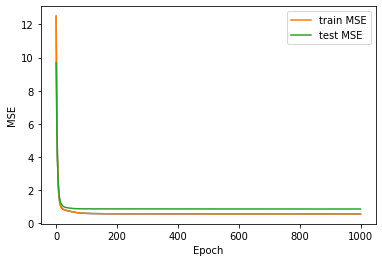

In [35]:
plt.plot(X, Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X, Y, label="train MSE")
plt.plot(X, Y_test, label="test MSE") # overfitting
plt.legend()
plt.show()